In [5]:
!pip install xgboost

 Dataset loaded successfully!
 Cleaning column: Last Week
 Cleaning column: Last Month
 Cleaning column: Last Year
 Cleaning column: Last Week.1
 Cleaning column: Last Month.1
 Cleaning column: Last Year.1
 Cleaning column: Today Price

 Missing values after cleaning:
Last Week       170
Last Month      311
Last Year       770
Last Week.1     170
Last Month.1    311
Last Year.1     770
Today Price       0
dtype: int64
🔧 Encoding categorical column: Commodity
🔧 Encoding categorical column: State
🔧 Encoding categorical column: Market
 All features are numeric. Proceeding...
 Training XGBoost Regressor
 Training Linear Regression

📈 XGBoost Regression Metrics:
MAE  : 301.20
MSE  : 2434387.89
RMSE : 1560.25
R2   : 0.67

📈 Linear Regression Regression Metrics:
MAE  : 391.51
MSE  : 499429.82
RMSE : 706.70
R2   : 0.93


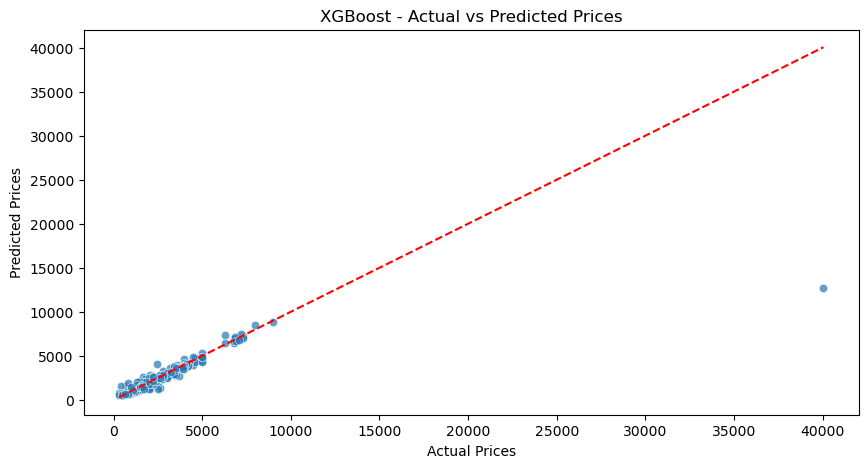

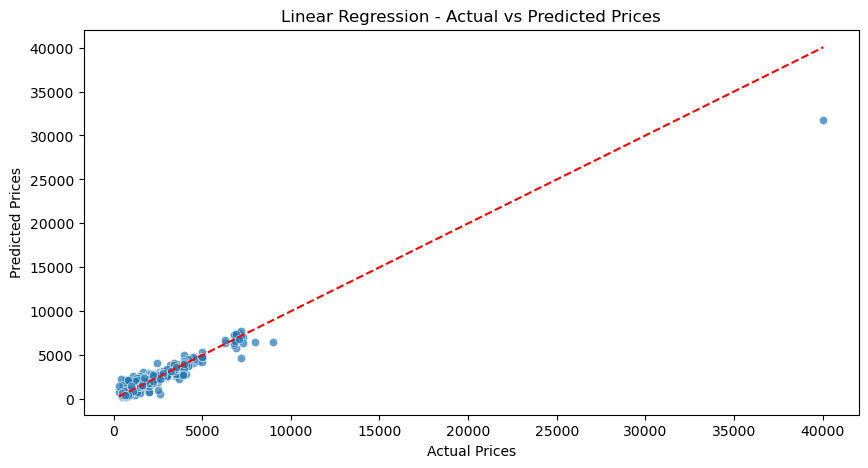

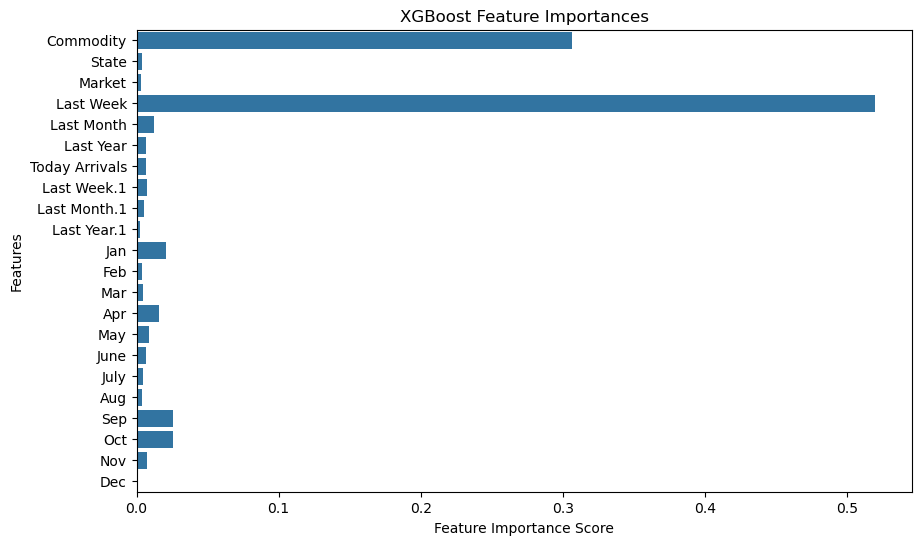

✅ All tasks completed successfully!


In [3]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score
)

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset
file_path = "C:\\Users\\shiva\\OneDrive\\Desktop\\Copy of final_optimized_dataset(1).xlsx"
df = pd.read_excel(file_path)

print(" Dataset loaded successfully!")

# Clean Columns with Mixed Data (including Today Price)
columns_to_clean = [
    'Last Week', 'Last Month', 'Last Year',
    'Last Week.1', 'Last Month.1', 'Last Year.1',
    'Today Price'
]

for col in columns_to_clean:
    if col in df.columns:
        print(f" Cleaning column: {col}")
        
        # Replace '-' with NaN
        df[col] = df[col].replace('-', np.nan)
        
        # Extract the first numeric value from strings like '2800 (Mx:3000 Mn:2500)'
        df[col] = df[col].astype(str).str.extract(r'([\d.]+)')[0]
        
        # Convert to numeric values
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handling the Missing Values
print("\n Missing values after cleaning:")
print(df[columns_to_clean].isnull().sum())

# Dropping rows where the target (Today Price) is missing
df.dropna(subset=['Today Price'], inplace=True)


# Encoding Categorical Columns

label_encoders = {}
categorical_columns = ["Commodity", "State", "Market"]

for col in categorical_columns:
    if col in df.columns:
        print(f"🔧 Encoding categorical column: {col}")
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])


# Defining Features (X) and Target (y)
X = df.drop(columns=["Today Price"])
y = df["Today Price"]

# Confirming No Object Columns Remain
object_cols_remaining = X.select_dtypes(include='object').columns.tolist()
if object_cols_remaining:
    print("Remaining object columns (need fixing):", object_cols_remaining)
else:
    print(" All features are numeric. Proceeding...")

# Imputing Remaining Missing Values in X
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'constant' if preferred
X_imputed = imputer.fit_transform(X)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Training XGBoost Model
print(" Training XGBoost Regressor")
xgb_model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Training Linear Regression Model
print(" Training Linear Regression")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Regression Evaluation Function
def evaluate_regression(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📈 {model_name} Regression Metrics:")
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R2   : {r2:.2f}")

# Evaluating Regression Models
evaluate_regression(y_test, y_pred_xgb, "XGBoost")
evaluate_regression(y_test, y_pred_lr, "Linear Regression")

# Visualization: Actual vs Predicted (XGBoost)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.title("XGBoost - Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Visualization: Actual vs Predicted (Linear Regression)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.title("Linear Regression - Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# XGBoost Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importances")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

print("✅ All tasks completed successfully!")


📊 Classification Report - XGBoost:
              precision    recall  f1-score   support

        High       0.91      0.96      0.93       149
         Low       0.83      0.72      0.77        61
    Moderate       0.74      0.79      0.76        81
   Very High       0.96      1.00      0.98        22
    Very Low       0.00      0.00      0.00         8

    accuracy                           0.85       321
   macro avg       0.69      0.69      0.69       321
weighted avg       0.83      0.85      0.84       321


📊 Classification Report - Linear Regression:
              precision    recall  f1-score   support

        High       0.80      0.97      0.88       149
         Low       0.73      0.49      0.59        61
    Moderate       0.69      0.53      0.60        81
   Very High       0.95      0.95      0.95        22
    Very Low       0.18      0.38      0.24         8

    accuracy                           0.75       321
   macro avg       0.67      0.66      0.65       

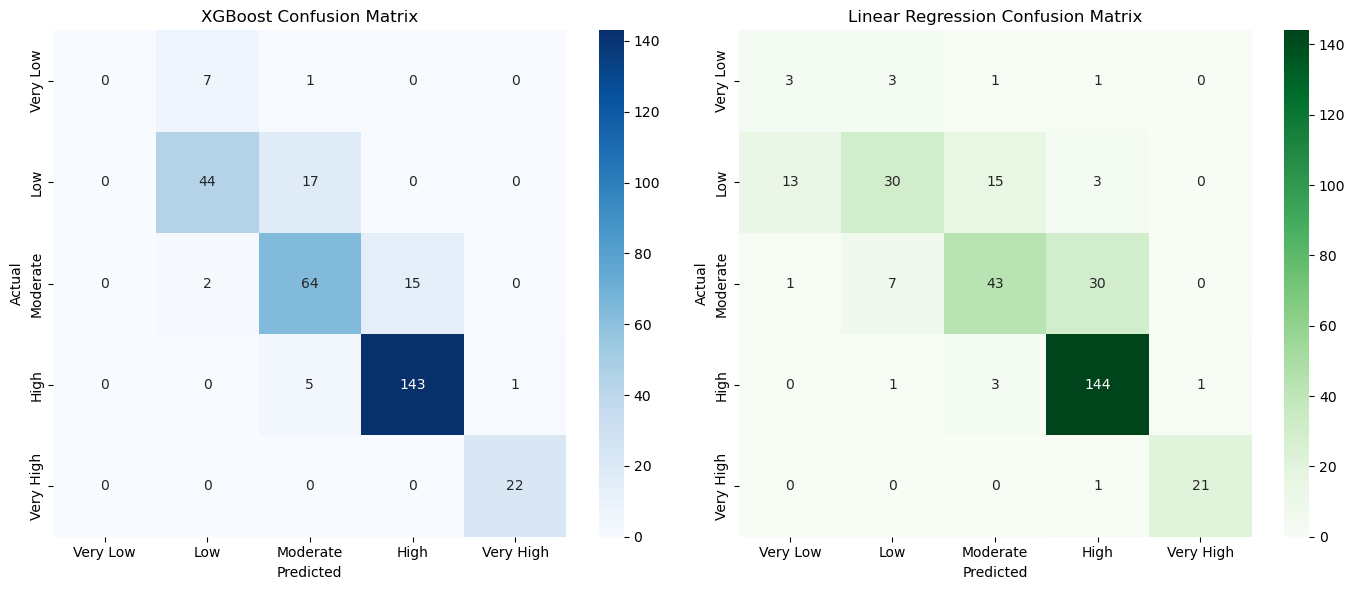

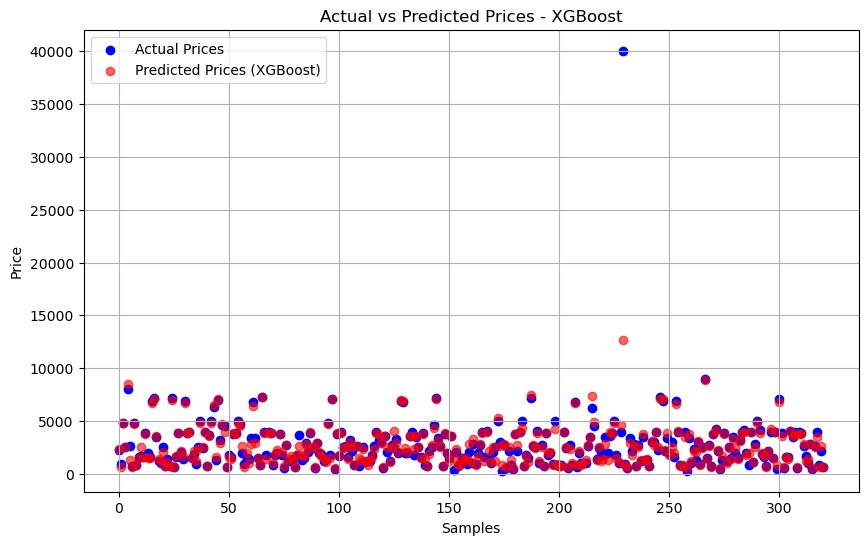

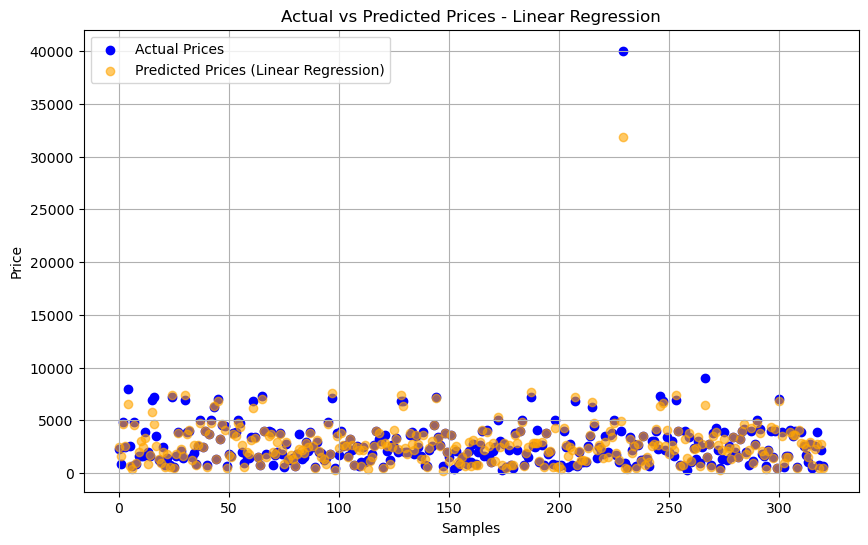

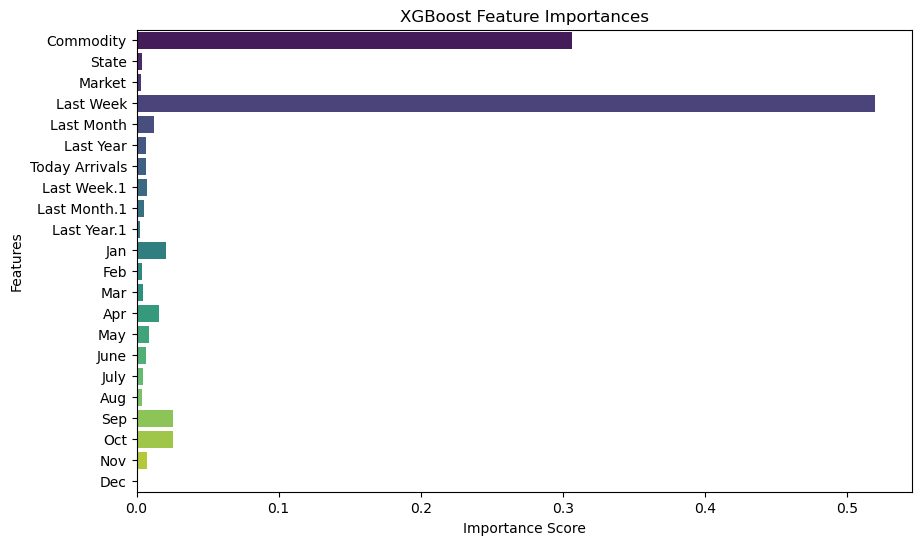

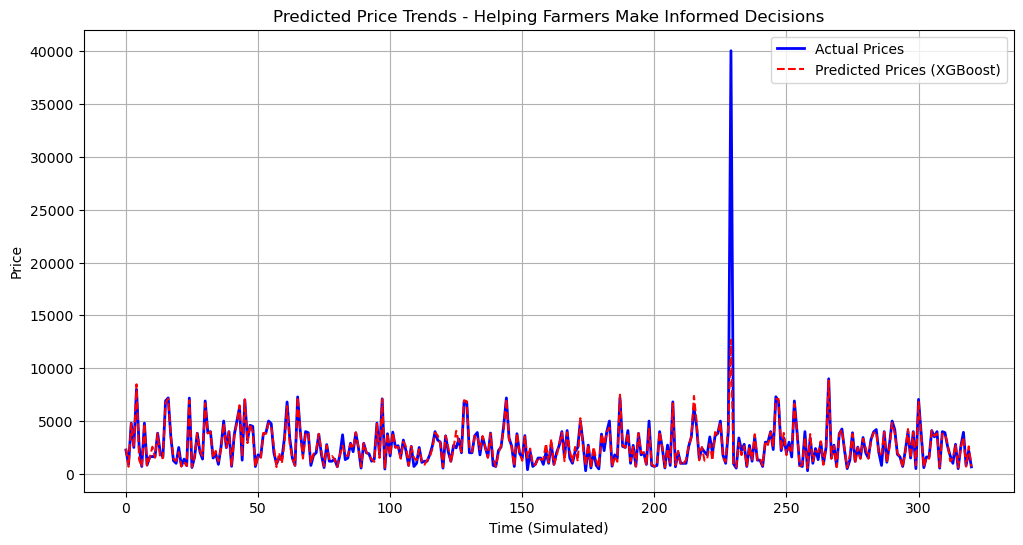

In [22]:
# Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Converting continuous target to categories for classification metrics
bins = [0, 500, 1000, 2000, 5000, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Bin actual and predicted prices
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
y_pred_xgb_binned = pd.cut(y_pred_xgb, bins=bins, labels=labels)
y_pred_lr_binned = pd.cut(y_pred_lr, bins=bins, labels=labels)

# Classification Metrics (XGBoost)
print("📊 Classification Report - XGBoost:")
print(classification_report(y_test_binned, y_pred_xgb_binned))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_binned, y_pred_xgb_binned, labels=labels)

# Classification Metrics (Linear Regression)
print("\n📊 Classification Report - Linear Regression:")
print(classification_report(y_test_binned, y_pred_lr_binned))

# Confusion Matrix
cm_lr = confusion_matrix(y_test_binned, y_pred_lr_binned, labels=labels)

# Plotting Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axs[0])
axs[0].set_title('XGBoost Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axs[1])
axs[1].set_title('Linear Regression Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred_xgb)), y_pred_xgb, color='red', label='Predicted Prices (XGBoost)', alpha=0.6)
plt.title('Actual vs Predicted Prices - XGBoost')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='orange', label='Predicted Prices (Linear Regression)', alpha=0.6)
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance (XGBoost)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns, palette="viridis")
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Predicted Price Trends Over Time (Demo Time Series Plot)
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Prices', color='blue', linewidth=2)
plt.plot(range(len(y_pred_xgb)), y_pred_xgb, label='Predicted Prices (XGBoost)', color='red', linestyle='--')
plt.title('Predicted Price Trends - Helping Farmers Make Informed Decisions')
plt.xlabel('Time (Simulated)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Defining bins and labels
bins = [0, 2000, 4000, 6000, 8000, float('inf')]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Bin actual prices
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

# Bin predicted prices from XGBoost and Linear Regression
y_pred_xgb_binned = pd.cut(y_pred_xgb, bins=bins, labels=labels)
y_pred_lr_binned = pd.cut(y_pred_lr, bins=bins, labels=labels)

# Evaluate Accuracy
accuracy_xgb = accuracy_score(y_test_binned, y_pred_xgb_binned)
accuracy_lr = accuracy_score(y_test_binned, y_pred_lr_binned)

print(f" XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(f" Linear Regression Accuracy: {accuracy_lr * 100:.2f}%")

# Combined Accuracies
combined_accuracy = (accuracy_xgb + accuracy_lr) / 2
print(f" Combined Overall Accuracy (Simple Average): {combined_accuracy * 100:.2f}%")

combined_accuracy_weighted = (accuracy_xgb * 0.7) + (accuracy_lr * 0.3)
print(f" Combined Overall Accuracy (Weighted): {combined_accuracy_weighted * 100:.2f}%")


 XGBoost Accuracy: 90.65%
 Linear Regression Accuracy: 81.62%
 Combined Overall Accuracy (Simple Average): 86.14%
 Combined Overall Accuracy (Weighted): 87.94%
